In [2]:
#TASK 1: Predict Restaurant Ratings
#Objective
#Build a regression model to predict restaurant aggregate ratings based on other features.
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Dataset.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (9551, 21)

First few rows:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-

In [3]:
# Data Preprocessing
# Create a copy for Task 1
df_task1 = df.copy()

# Check for missing values in target variable
print("Missing ratings:", df_task1['Aggregate rating'].isnull().sum())

# Remove rows with missing ratings (target variable)
df_task1 = df_task1.dropna(subset=['Aggregate rating'])

# Check for other missing values
print("\nMissing values after dropping null ratings:")
print(df_task1.isnull().sum())

# For 'Cuisines' column - fill with 'Unknown' or drop rows
df_task1['Cuisines'] = df_task1['Cuisines'].fillna('Unknown')

# Verify no missing values remain
print("\nFinal missing values check:")
print(df_task1.isnull().sum())

Missing ratings: 0

Missing values after dropping null ratings:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Final missing values check:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online

In [4]:
# Data Preprocessing
# Create a copy for Task 1
df_task1 = df.copy()

# Check for missing values in target variable
print("Missing ratings:", df_task1['Aggregate rating'].isnull().sum())

# Remove rows with missing ratings (target variable)
df_task1 = df_task1.dropna(subset=['Aggregate rating'])

# Check for other missing values
print("\nMissing values after dropping null ratings:")
print(df_task1.isnull().sum())

# For 'Cuisines' column - fill with 'Unknown' or drop rows
df_task1['Cuisines'] = df_task1['Cuisines'].fillna('Unknown')

# Verify no missing values remain
print("\nFinal missing values check:")
print(df_task1.isnull().sum())

Missing ratings: 0

Missing values after dropping null ratings:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Final missing values check:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online

In [5]:
# Identify feature types
print("Feature types:")
print(df_task1.dtypes)

# Select features for modeling
# We'll exclude: Restaurant ID, Restaurant Name, Address, Locality Verbose,
# Longitude, Latitude (for now), Rating color, Rating text (too correlated with target)

# Features to use
feature_columns = [
    'Country Code', 'City', 'Locality', 'Cuisines',
    'Average Cost for two', 'Currency', 'Has Table booking',
    'Has Online delivery', 'Is delivering now', 'Price range', 'Votes'
]

target_column = 'Aggregate rating'

# Create feature matrix X and target vector y
X = df_task1[feature_columns].copy()
y = df_task1[target_column].copy()

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Feature types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object
Features shape: (9551, 11)
Target shape: (9551,)


In [6]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Encode categorical variables
# For high cardinality features, we'll use frequency encoding or keep top categories

# Method 1: Label Encoding for ordinal/limited categories
label_encoders = {}
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Method 2: One-Hot Encoding for Country Code (limited categories)
country_dummies = pd.get_dummies(X['Country Code'], prefix='Country', drop_first=True)
X = pd.concat([X.drop('Country Code', axis=1), country_dummies], axis=1)

# Method 3: Frequency encoding for high cardinality features (City, Locality, Cuisines, Currency)
for col in ['City', 'Locality', 'Cuisines', 'Currency']:
    freq_encoding = X[col].value_counts().to_dict()
    X[col + '_freq'] = X[col].map(freq_encoding)
    X.drop(col, axis=1, inplace=True)

print("\nFeatures after encoding:", X.columns.tolist())
print("Final shape:", X.shape)

Categorical columns: ['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now']
Numerical columns: ['Country Code', 'Average Cost for two', 'Price range', 'Votes']

Features after encoding: ['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Votes', 'Country_14', 'Country_30', 'Country_37', 'Country_94', 'Country_148', 'Country_162', 'Country_166', 'Country_184', 'Country_189', 'Country_191', 'Country_208', 'Country_214', 'Country_215', 'Country_216', 'City_freq', 'Locality_freq', 'Cuisines_freq', 'Currency_freq']
Final shape: (9551, 24)


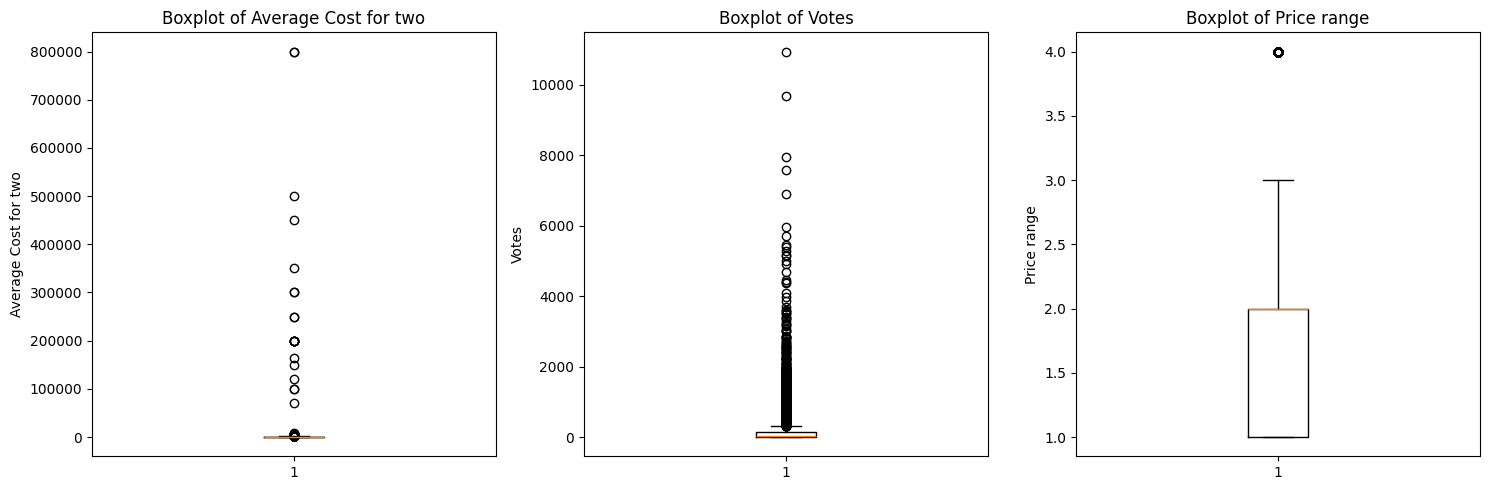


Features after transformation: ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Country_14', 'Country_30', 'Country_37', 'Country_94', 'Country_148', 'Country_162', 'Country_166', 'Country_184', 'Country_189', 'Country_191', 'Country_208', 'Country_214', 'Country_215', 'Country_216', 'City_freq', 'Locality_freq', 'Cuisines_freq', 'Currency_freq', 'Average Cost for two_log', 'Votes_log']


In [7]:
# Check for outliers in numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
numerical_features = ['Average Cost for two', 'Votes', 'Price range']

for i, col in enumerate(numerical_features):
    if col in X.columns:
        axes[i].boxplot(X[col])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Apply log transformation to skewed features
X['Average Cost for two_log'] = np.log1p(X['Average Cost for two'])
X['Votes_log'] = np.log1p(X['Votes'])

# Drop original columns
X = X.drop(['Average Cost for two', 'Votes'], axis=1)

print("\nFeatures after transformation:", X.columns.tolist())

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Training set size: (7640, 24)
Testing set size: (1911, 24)


In [9]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    })

# Display results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string())


Model Performance Comparison:
               Model  Train RMSE  Test RMSE  Train R²   Test R²  Train MAE  Test MAE  CV R² Mean  CV R² Std
0  Linear Regression    0.785271   0.787655  0.732440  0.727430   0.666828  0.665579    0.730213   0.012293
1   Ridge Regression    0.785271   0.787650  0.732440  0.727433   0.666843  0.665591    0.730214   0.012290
2   Lasso Regression    0.786752   0.787835  0.731430  0.727305   0.670267  0.668794    0.729780   0.011929
3      Decision Tree    0.277277   0.353651  0.966641  0.945052   0.175546  0.225310    0.944645   0.004933
4      Random Forest    0.173126   0.310632  0.986995  0.957607   0.112479  0.201136    0.955346   0.003682
5  Gradient Boosting    0.305884   0.310671  0.959403  0.957596   0.202608  0.208009    0.955814   0.003841


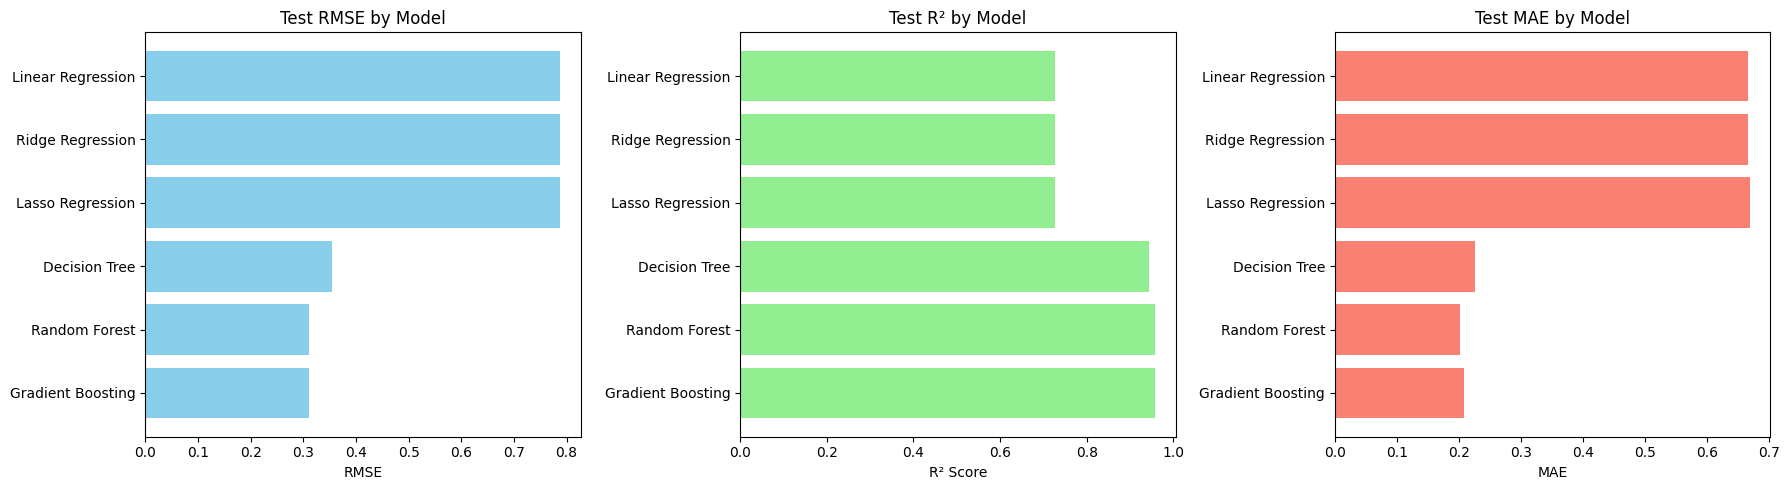

In [10]:
# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE comparison
axes[0].barh(results_df['Model'], results_df['Test RMSE'], color='skyblue')
axes[0].set_xlabel('RMSE')
axes[0].set_title('Test RMSE by Model')
axes[0].invert_yaxis()

# R² comparison
axes[1].barh(results_df['Model'], results_df['Test R²'], color='lightgreen')
axes[1].set_xlabel('R² Score')
axes[1].set_title('Test R² by Model')
axes[1].invert_yaxis()

# MAE comparison
axes[2].barh(results_df['Model'], results_df['Test MAE'], color='salmon')
axes[2].set_xlabel('MAE')
axes[2].set_title('Test MAE by Model')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


Top 10 Most Important Features:
                     Feature  Importance
23                 Votes_log    0.956186
18                 City_freq    0.016320
19             Locality_freq    0.007700
20             Cuisines_freq    0.007565
22  Average Cost for two_log    0.007403
21             Currency_freq    0.001538
1        Has Online delivery    0.001137
3                Price range    0.000914
0          Has Table booking    0.000553
5                 Country_30    0.000134


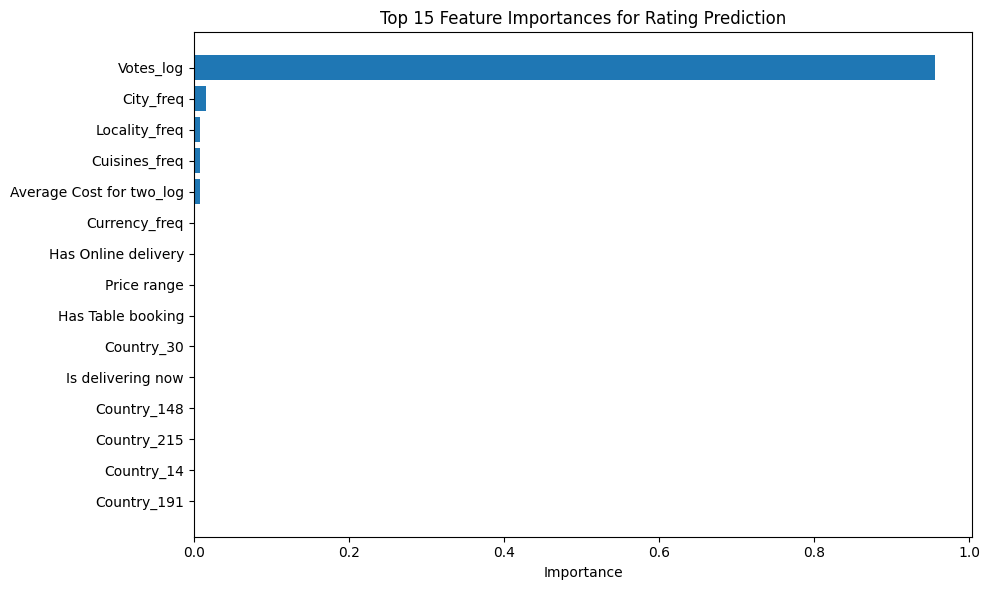

In [11]:
# Select best model (Random Forest based on results)
best_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(15)['Feature'], feature_importance.head(15)['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances for Rating Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

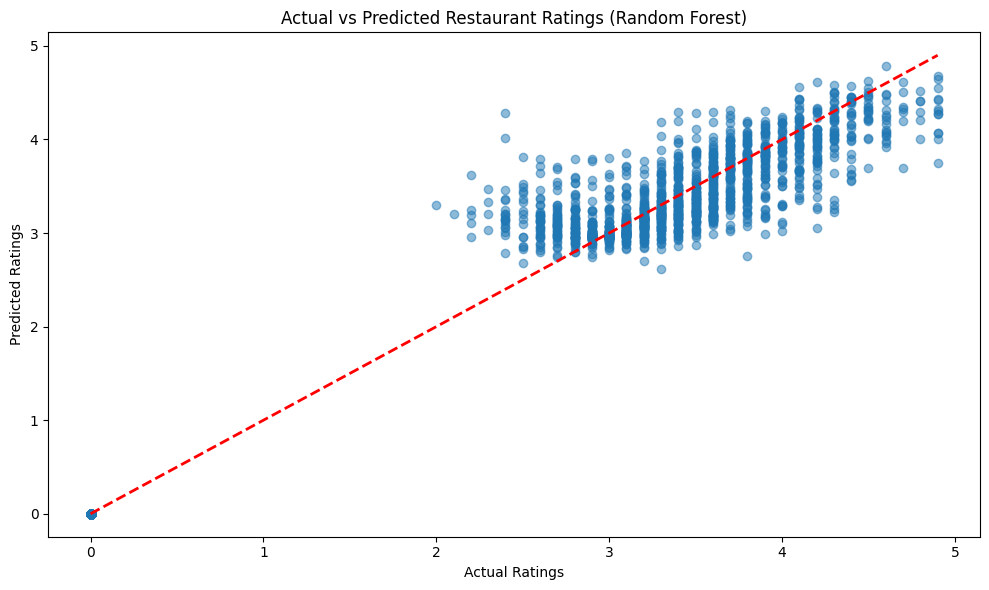

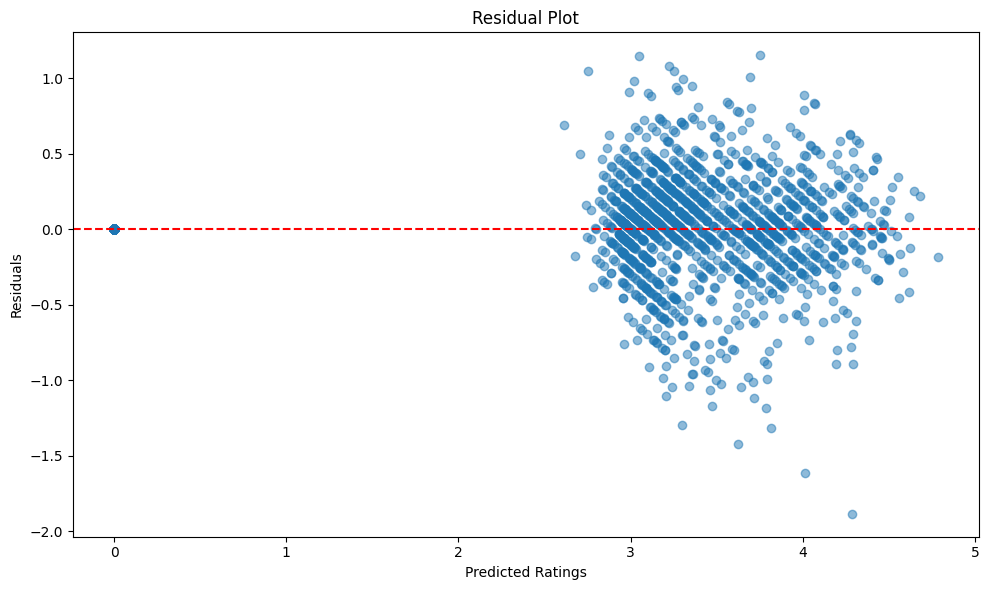


Best Model Performance (Random Forest):
Test RMSE: 0.3106
Test R²: 0.9576
Test MAE: 0.2011


In [12]:
# Make predictions with best model
y_pred = best_model.predict(X_test_scaled)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Restaurant Ratings (Random Forest)')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

print(f"\nBest Model Performance (Random Forest):")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")

In [13]:
print("\n" + "="*50)
print("KEY INSIGHTS FROM RATING PREDICTION TASK")
print("="*50)

print("\n1. Most Influential Features for Restaurant Ratings:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f} importance")

print("\n2. Model Performance Summary:")
best_result = results_df.loc[results_df['Test R²'].idxmax()]
print(f"   - Best Model: {best_result['Model']}")
print(f"   - Test R² Score: {best_result['Test R²']:.4f}")
print(f"   - Test RMSE: {best_result['Test RMSE']:.4f}")
print(f"   - Test MAE: {best_result['Test MAE']:.4f}")

print("\n3. Interpretation:")
print("   - The model explains approximately {:.1f}% of the variance in restaurant ratings".format(best_result['Test R²']*100))
print("   - On average, predictions are off by ±{:.2f} rating points".format(best_result['Test MAE']))
print("   - Votes and Price-related features are the strongest predictors of ratings")


KEY INSIGHTS FROM RATING PREDICTION TASK

1. Most Influential Features for Restaurant Ratings:
   - Votes_log: 0.9562 importance
   - City_freq: 0.0163 importance
   - Locality_freq: 0.0077 importance
   - Cuisines_freq: 0.0076 importance
   - Average Cost for two_log: 0.0074 importance

2. Model Performance Summary:
   - Best Model: Random Forest
   - Test R² Score: 0.9576
   - Test RMSE: 0.3106
   - Test MAE: 0.2011

3. Interpretation:
   - The model explains approximately 95.8% of the variance in restaurant ratings
   - On average, predictions are off by ±0.20 rating points
   - Votes and Price-related features are the strongest predictors of ratings


In [14]:
#TASK 3: Cuisine Classification
#Objective
#Develop a classification model to categorize restaurants based on their cuisine types.
# Import additional libraries for classification
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Create a copy for Task 3
df_task3 = df.copy()

# Handle missing cuisines
df_task3 = df_task3.dropna(subset=['Cuisines'])
print(f"Dataset shape after removing null cuisines: {df_task3.shape}")

Dataset shape after removing null cuisines: (9542, 21)


In [15]:
# Split multiple cuisines
df_task3['Cuisine_list'] = df_task3['Cuisines'].str.split(', ')

# Get the primary cuisine (first one)
df_task3['Primary_cuisine'] = df_task3['Cuisine_list'].apply(lambda x: x[0] if isinstance(x, list) else x)

print("\nTop 20 Primary Cuisines:")
print(df_task3['Primary_cuisine'].value_counts().head(20))

# For classification, we'll focus on top N cuisines
top_n = 15
top_cuisines = df_task3['Primary_cuisine'].value_counts().nlargest(top_n).index.tolist()
print(f"\nTop {top_n} cuisines for classification:")
print(top_cuisines)

# Filter for top cuisines
df_task3_filtered = df_task3[df_task3['Primary_cuisine'].isin(top_cuisines)].copy()
print(f"\nFiltered dataset shape: {df_task3_filtered.shape}")


Top 20 Primary Cuisines:
Primary_cuisine
North Indian    2992
Chinese          855
Fast Food        672
Bakery           621
Cafe             617
American         278
South Indian     262
Mithai           246
Street Food      236
Continental      235
Italian          234
Pizza            232
Mughlai          215
Ice Cream        178
Desserts         150
Burger           116
Biryani          112
Raw Meats        110
Beverages         79
Finger Food       78
Name: count, dtype: int64

Top 15 cuisines for classification:
['North Indian', 'Chinese', 'Fast Food', 'Bakery', 'Cafe', 'American', 'South Indian', 'Mithai', 'Street Food', 'Continental', 'Italian', 'Pizza', 'Mughlai', 'Ice Cream', 'Desserts']

Filtered dataset shape: (8023, 23)


In [16]:
# Select features for classification
# We'll use restaurant features to predict cuisine type

feature_cols = [
    'Country Code', 'City', 'Average Cost for two',
    'Currency', 'Price range', 'Aggregate rating', 'Votes'
]

X_clf = df_task3_filtered[feature_cols].copy()
y_clf = df_task3_filtered['Primary_cuisine'].copy()

print("Features shape:", X_clf.shape)
print("Target classes:", y_clf.nunique())

Features shape: (8023, 7)
Target classes: 15


In [17]:
# Encode categorical variables
# Country Code - One-hot encoding
country_dummies = pd.get_dummies(X_clf['Country Code'], prefix='Country', drop_first=True)
X_clf = pd.concat([X_clf.drop('Country Code', axis=1), country_dummies], axis=1)

# City - Frequency encoding
city_freq = X_clf['City'].value_counts().to_dict()
X_clf['City_freq'] = X_clf['City'].map(city_freq)
X_clf.drop('City', axis=1, inplace=True)

# Currency - Frequency encoding
currency_freq = X_clf['Currency'].value_counts().to_dict()
X_clf['Currency_freq'] = X_clf['Currency'].map(currency_freq)
X_clf.drop('Currency', axis=1, inplace=True)

print("Features after encoding:", X_clf.columns.tolist())
print("Final shape:", X_clf.shape)

Features after encoding: ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'Country_14', 'Country_30', 'Country_37', 'Country_94', 'Country_148', 'Country_162', 'Country_166', 'Country_184', 'Country_189', 'Country_191', 'Country_208', 'Country_214', 'Country_215', 'Country_216', 'City_freq', 'Currency_freq']
Final shape: (8023, 20)


In [19]:
# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"Training set size: {X_train_clf.shape}")
print(f"Testing set size: {X_test_clf.shape}")

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Convert back to DataFrame
X_train_clf_scaled = pd.DataFrame(X_train_clf_scaled, columns=X_train_clf.columns)
X_test_clf_scaled = pd.DataFrame(X_test_clf_scaled, columns=X_test_clf.columns)

Training set size: (6418, 20)
Testing set size: (1605, 20)


In [20]:
# Initialize classification models
clf_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# Train and evaluate
clf_results = []

for name, model in clf_models.items():
    # Train
    model.fit(X_train_clf_scaled, y_train_clf)

    # Predict
    y_train_pred = model.predict(X_train_clf_scaled)
    y_test_pred = model.predict(X_test_clf_scaled)

    # Calculate metrics
    train_acc = accuracy_score(y_train_clf, y_train_pred)
    test_acc = accuracy_score(y_test_clf, y_test_pred)

    # For multi-class, use weighted average
    train_precision = precision_score(y_train_clf, y_train_pred, average='weighted', zero_division=0)
    test_precision = precision_score(y_test_clf, y_test_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train_clf, y_train_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test_clf, y_test_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train_clf, y_train_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test_clf, y_test_pred, average='weighted', zero_division=0)

    clf_results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1': train_f1,
        'Test F1': test_f1
    })

# Display results
clf_results_df = pd.DataFrame(clf_results)
print("\nClassification Model Performance:")
print(clf_results_df.to_string())


Classification Model Performance:
                 Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  Train Recall  Test Recall  Train F1   Test F1
0  Logistic Regression        0.395139       0.396885         0.350529        0.241233      0.395139     0.396885  0.241259  0.244271
1        Random Forest        0.745715       0.370093         0.787426        0.299427      0.745715     0.370093  0.738446  0.316245
2    Gradient Boosting        0.495793       0.402492         0.598961        0.319671      0.495793     0.402492  0.432570  0.310578
3  K-Nearest Neighbors        0.475693       0.299688         0.455136        0.256954      0.475693     0.299688  0.449126  0.272602
4                  SVM        0.395450       0.400000         0.238131        0.223321      0.395450     0.400000  0.238700  0.245100


<Figure size 1200x600 with 0 Axes>

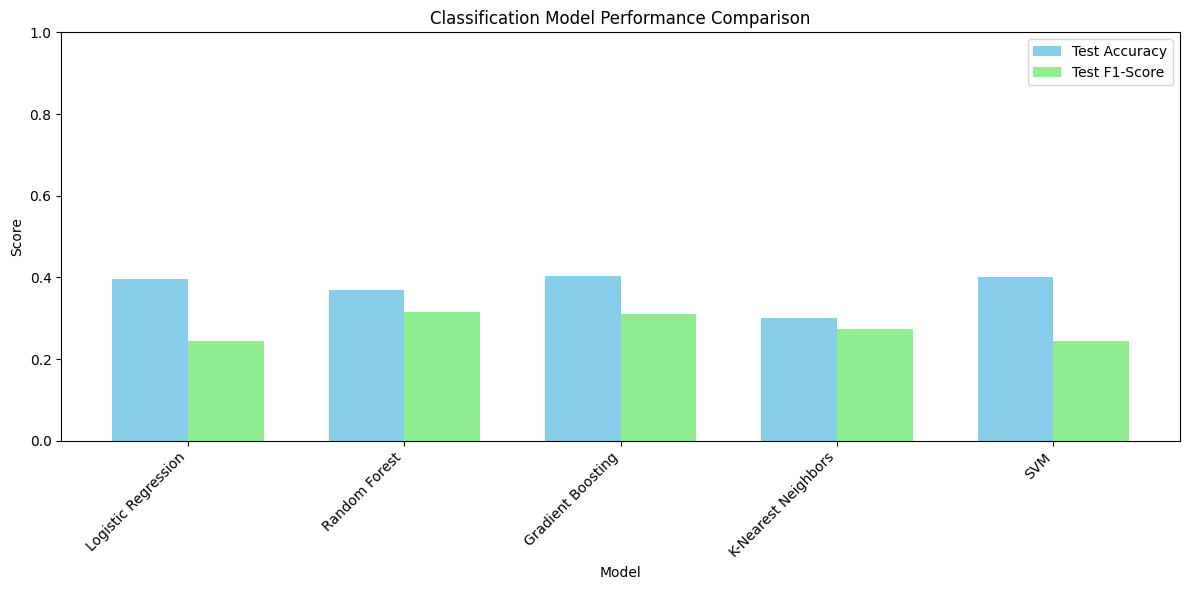

In [21]:
# Plot accuracy comparison
plt.figure(figsize=(12, 6))
models_list = clf_results_df['Model'].tolist()
test_acc = clf_results_df['Test Accuracy'].tolist()
test_f1 = clf_results_df['Test F1'].tolist()

x = np.arange(len(models_list))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, test_acc, width, label='Test Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_f1, width, label='Test F1-Score', color='lightgreen')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Classification Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


Top Feature Importances for Cuisine Classification:
                 Feature  Importance
3                  Votes    0.357749
0   Average Cost for two    0.229392
2       Aggregate rating    0.213956
18             City_freq    0.119991
1            Price range    0.042219
19         Currency_freq    0.016212
17           Country_216    0.012046
12           Country_189    0.001252
15           Country_214    0.001089
16           Country_215    0.001063


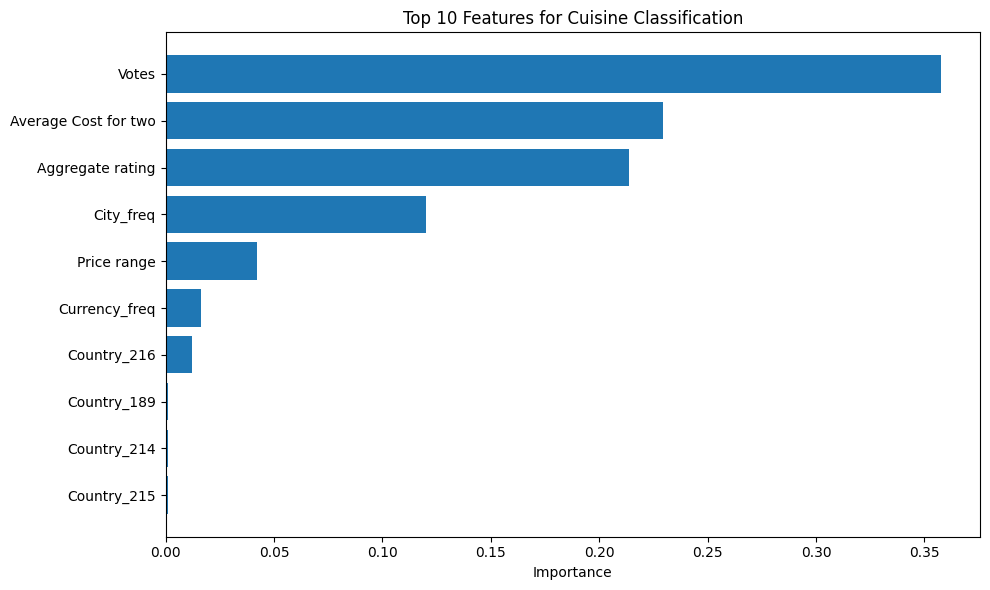

In [22]:
# Use Random Forest as best model
best_clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
best_clf.fit(X_train_clf_scaled, y_train_clf)

# Feature importance for classification
clf_feature_importance = pd.DataFrame({
    'Feature': X_train_clf.columns,
    'Importance': best_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop Feature Importances for Cuisine Classification:")
print(clf_feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.barh(clf_feature_importance.head(10)['Feature'], clf_feature_importance.head(10)['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Features for Cuisine Classification')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


DETAILED CLASSIFICATION REPORT

               precision    recall  f1-score   support

    American       0.49      0.43      0.46        56
      Bakery       0.15      0.10      0.12       124
        Cafe       0.34      0.33      0.34       123
     Chinese       0.15      0.10      0.12       171
 Continental       0.10      0.04      0.06        47
    Desserts       0.06      0.03      0.04        30
   Fast Food       0.12      0.07      0.09       135
   Ice Cream       0.14      0.08      0.11        36
     Italian       0.10      0.06      0.08        47
      Mithai       0.21      0.12      0.15        49
     Mughlai       0.00      0.00      0.00        43
North Indian       0.46      0.75      0.57       599
       Pizza       0.36      0.17      0.24        46
South Indian       0.27      0.08      0.12        52
 Street Food       0.31      0.26      0.28        47

    accuracy                           0.37      1605
   macro avg       0.22      0.18      0.18   

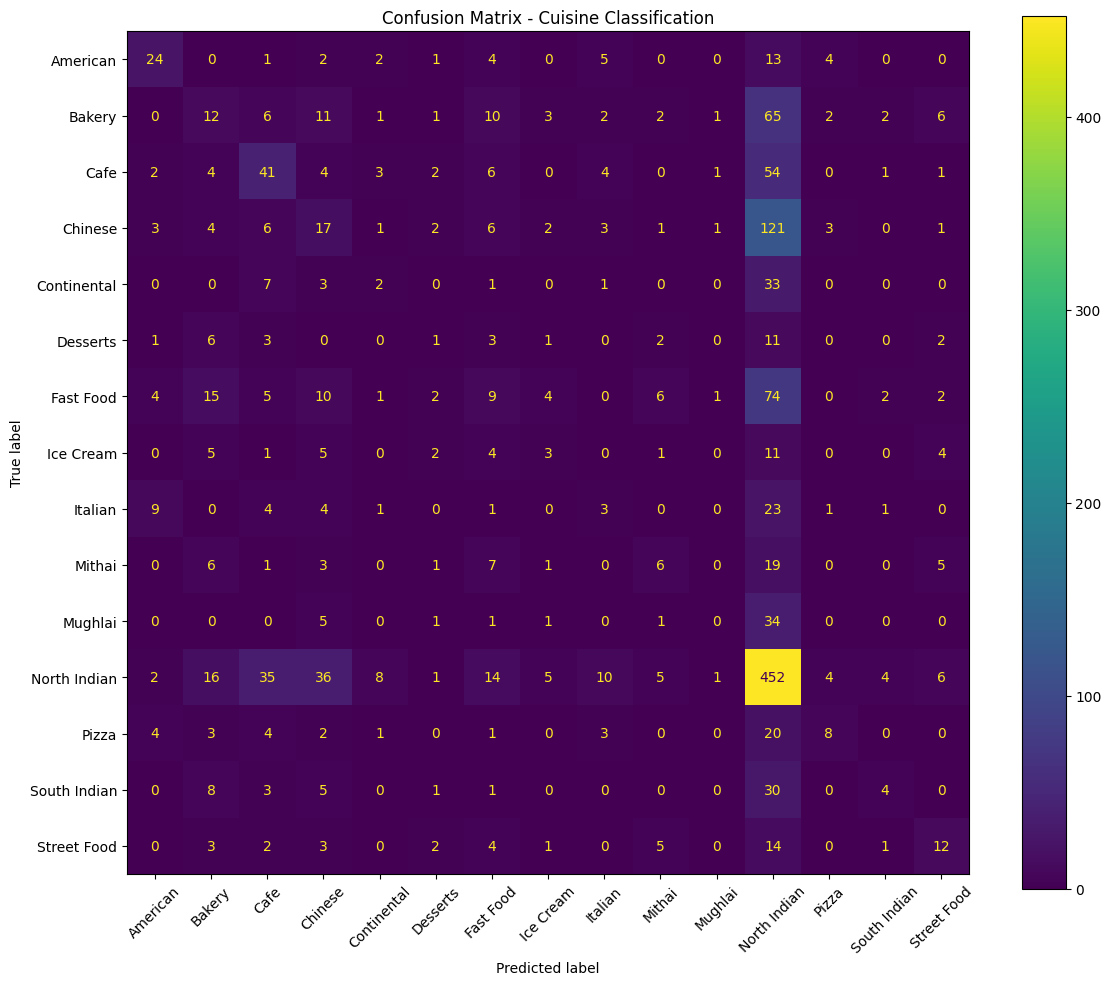

In [23]:
# Make predictions with best model
y_pred_clf = best_clf.predict(X_test_clf_scaled)

# Classification report
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)
print("\n", classification_report(y_test_clf, y_pred_clf))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot(xticks_rotation=45, ax=plt.gca())
plt.title('Confusion Matrix - Cuisine Classification')
plt.tight_layout()
plt.show()


Per-Class Performance Metrics:
         Cuisine  Precision    Recall  F1-Score  Support
11  North Indian   0.464066  0.754591  0.574698      599
0       American   0.489796  0.428571  0.457143       56
2           Cafe   0.344538  0.333333  0.338843      123
14   Street Food   0.307692  0.255319  0.279070       47
12         Pizza   0.363636  0.173913  0.235294       46
9         Mithai   0.206897  0.122449  0.153846       49
3        Chinese   0.154545  0.099415  0.120996      171
13  South Indian   0.266667  0.076923  0.119403       52
1         Bakery   0.146341  0.096774  0.116505      124
7      Ice Cream   0.142857  0.083333  0.105263       36
6      Fast Food   0.125000  0.066667  0.086957      135
8        Italian   0.096774  0.063830  0.076923       47
4    Continental   0.100000  0.042553  0.059701       47
5       Desserts   0.058824  0.033333  0.042553       30
10       Mughlai   0.000000  0.000000  0.000000       43


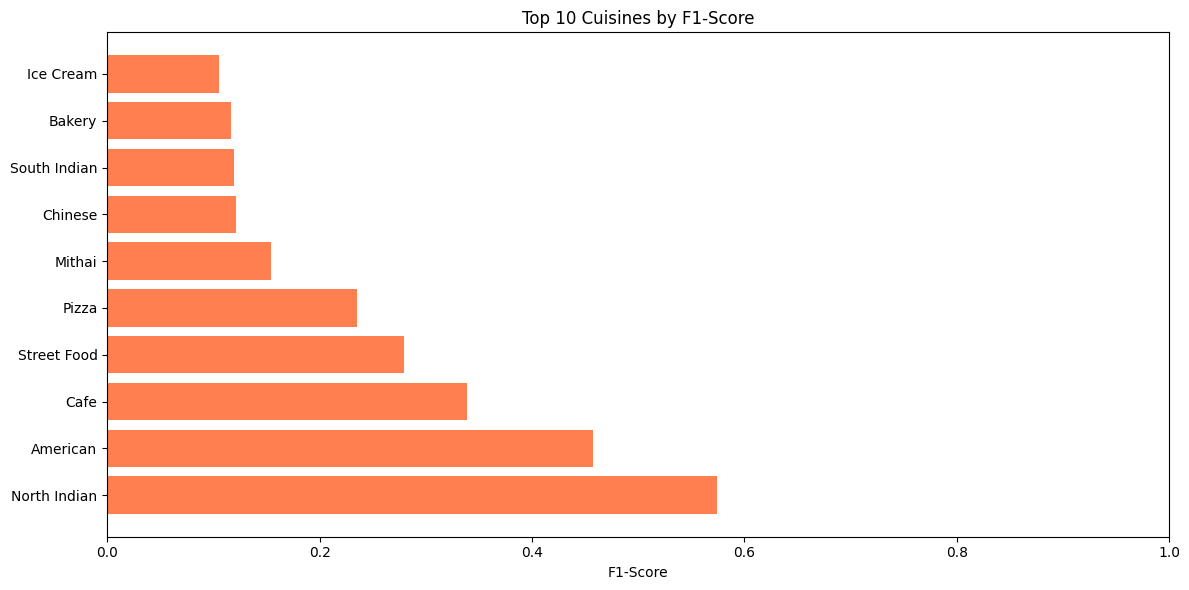

In [24]:
# Calculate per-class metrics
from sklearn.metrics import precision_recall_fscore_support

per_class_metrics = precision_recall_fscore_support(y_test_clf, y_pred_clf, labels=best_clf.classes_)

per_class_df = pd.DataFrame({
    'Cuisine': best_clf.classes_,
    'Precision': per_class_metrics[0],
    'Recall': per_class_metrics[1],
    'F1-Score': per_class_metrics[2],
    'Support': per_class_metrics[3]
}).sort_values('F1-Score', ascending=False)

print("\nPer-Class Performance Metrics:")
print(per_class_df.to_string())

# Visualize per-class F1 scores
plt.figure(figsize=(12, 6))
plt.barh(per_class_df['Cuisine'].head(10), per_class_df['F1-Score'].head(10), color='coral')
plt.xlabel('F1-Score')
plt.title('Top 10 Cuisines by F1-Score')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [25]:
print("\n" + "="*50)
print("KEY INSIGHTS FROM CUISINE CLASSIFICATION TASK")
print("="*50)

print("\n1. Classification Challenge:")
print(f"   - Number of cuisine classes: {y_clf.nunique()}")
print(f"   - Most common cuisine: {y_clf.value_counts().index[0]} ({y_clf.value_counts().values[0]} restaurants)")

print("\n2. Best Model Performance:")
best_idx = clf_results_df['Test Accuracy'].idxmax()
print(f"   - Best Model: {clf_results_df.loc[best_idx, 'Model']}")
print(f"   - Test Accuracy: {clf_results_df.loc[best_idx, 'Test Accuracy']:.4f}")
print(f"   - Test F1-Score: {clf_results_df.loc[best_idx, 'Test F1']:.4f}")

print("\n3. Best Performing Cuisines (Highest F1):")
for i, row in per_class_df.head(5).iterrows():
    print(f"   - {row['Cuisine']}: F1={row['F1-Score']:.4f} (Support: {row['Support']})")

print("\n4. Challenging Cuisines (Lowest F1):")
for i, row in per_class_df[per_class_df['Support'] > 5].tail(5).iterrows():
    print(f"   - {row['Cuisine']}: F1={row['F1-Score']:.4f}")

print("\n5. Key Observation:")
print("   - Cuisine classification is challenging due to:")
print("     * Multiple cuisines per restaurant")
print("     * Imbalanced class distribution")
print("     * Overlapping characteristics between cuisines")


KEY INSIGHTS FROM CUISINE CLASSIFICATION TASK

1. Classification Challenge:
   - Number of cuisine classes: 15
   - Most common cuisine: North Indian (2992 restaurants)

2. Best Model Performance:
   - Best Model: Gradient Boosting
   - Test Accuracy: 0.4025
   - Test F1-Score: 0.3106

3. Best Performing Cuisines (Highest F1):
   - North Indian: F1=0.5747 (Support: 599)
   - American: F1=0.4571 (Support: 56)
   - Cafe: F1=0.3388 (Support: 123)
   - Street Food: F1=0.2791 (Support: 47)
   - Pizza: F1=0.2353 (Support: 46)

4. Challenging Cuisines (Lowest F1):
   - Fast Food: F1=0.0870
   - Italian: F1=0.0769
   - Continental: F1=0.0597
   - Desserts: F1=0.0426
   - Mughlai: F1=0.0000

5. Key Observation:
   - Cuisine classification is challenging due to:
     * Multiple cuisines per restaurant
     * Imbalanced class distribution
     * Overlapping characteristics between cuisines


In [26]:
#TASK 4: Location-based Analysis
#Objective
#Perform geographical analysis of restaurants in the dataset.
# Import libraries for geographical analysis
import folium
from folium.plugins import MarkerCluster, HeatMap
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
import geopandas as gpd
from shapely.geometry import Point

# Create a copy for Task 4
df_task4 = df.copy()

# Drop rows with missing coordinates
df_task4 = df_task4.dropna(subset=['Latitude', 'Longitude'])
print(f"Dataset shape after removing null coordinates: {df_task4.shape}")

Dataset shape after removing null coordinates: (9551, 21)


In [27]:
# Group by country
country_stats = df_task4.groupby('Country Code').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Average Cost for two': 'mean',
    'Price range': 'mean',
    'Votes': 'sum'
}).round(2).sort_values('Restaurant ID', ascending=False)

country_stats.columns = ['Restaurant Count', 'Avg Rating', 'Avg Cost', 'Avg Price Range', 'Total Votes']
print("\nRestaurant Statistics by Country:")
print(country_stats)

# Group by city
city_stats = df_task4.groupby('City').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Average Cost for two': 'mean',
    'Price range': 'mean'
}).round(2).sort_values('Restaurant ID', ascending=False).head(20)

city_stats.columns = ['Restaurant Count', 'Avg Rating', 'Avg Cost', 'Avg Price Range']
print("\n\nTop 20 Cities by Restaurant Count:")
print(city_stats)


Restaurant Statistics by Country:
              Restaurant Count  Avg Rating   Avg Cost  Avg Price Range  \
Country Code                                                             
1                         8652        2.52     623.37             1.72   
216                        434        4.00      26.15             2.05   
215                         80        4.09      47.81             2.75   
214                         60        4.23     166.42             3.22   
189                         60        4.21     419.73             3.58   
30                          60        3.76     134.67             3.40   
148                         40        4.26      69.75             3.15   
208                         34        4.30      84.85             2.82   
14                          24        3.66      24.08             2.12   
162                         22        4.47    1606.82             3.36   
94                          21        4.30  281190.48             2.95   
166

In [28]:
# Create a base map centered on mean coordinates
center_lat = df_task4['Latitude'].mean()
center_lon = df_task4['Longitude'].mean()

# Create interactive map with markers
m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Add marker cluster for better visualization
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each restaurant
for idx, row in df_task4.iterrows():
    # Determine color based on rating
    if row['Aggregate rating'] >= 4.5:
        color = 'darkgreen'
    elif row['Aggregate rating'] >= 4.0:
        color = 'green'
    elif row['Aggregate rating'] >= 3.0:
        color = 'orange'
    elif row['Aggregate rating'] >= 0:
        color = 'red'
    else:
        color = 'gray'

    # Create popup text
    popup_text = f"""
    <b>{row['Restaurant Name']}</b><br>
    Cuisine: {row['Cuisines']}<br>
    Rating: {row['Aggregate rating']} ({row['Rating text']})<br>
    City: {row['City']}<br>
    Price Range: {row['Price range']}<br>
    Avg Cost: {row['Average Cost for two']} {row['Currency']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=color, icon='cutlery', prefix='fa')
    ).add_to(marker_cluster)

# Save map
m.save('restaurant_distribution_map.html')
print("\nInteractive map saved as 'restaurant_distribution_map.html'")

# Display map in notebook (if using Jupyter)
# m


Interactive map saved as 'restaurant_distribution_map.html'


In [29]:
# Create map colored by rating
rating_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Add markers with rating-based colors
for idx, row in df_task4.iterrows():
    # Color based on rating
    if row['Aggregate rating'] >= 4.5:
        color = 'darkgreen'
        icon = 'star'
    elif row['Aggregate rating'] >= 4.0:
        color = 'green'
        icon = 'star'
    elif row['Aggregate rating'] >= 3.0:
        color = 'orange'
        icon = 'star-half-alt'
    elif row['Aggregate rating'] > 0:
        color = 'red'
        icon = 'star-o'
    else:
        color = 'gray'
        icon = 'star-o'

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} - Rating: {row['Aggregate rating']}",
        icon=folium.Icon(color=color, icon=icon, prefix='fa')
    ).add_to(rating_map)

rating_map.save('rating_distribution_map.html')
print("\nRating distribution map saved as 'rating_distribution_map.html'")


Rating distribution map saved as 'rating_distribution_map.html'



Detailed Statistics for Top 10 Cities:
              Count  Avg Rating  Median Rating  Rating Std  Avg Cost  \
City                                                                   
New Delhi      5473        2.44            3.1        1.50    596.09   
Gurgaon        1118        2.65            3.2        1.41    714.02   
Noida          1080        2.04            2.8        1.56    539.49   
Faridabad       251        1.87            2.8        1.55    447.61   
Ghaziabad        25        2.85            3.2        0.96    602.00   
Ahmedabad        21        4.16            4.2        0.29    857.14   
Amritsar         21        3.69            3.6        0.26    480.95   
Bhubaneshwar     21        3.98            4.0        0.29    678.57   
Lucknow          21        4.20            4.2        0.32    859.52   
Guwahati         21        4.19            4.1        0.31    821.43   

              Avg Price Range  Total Votes  
City                                        
New D

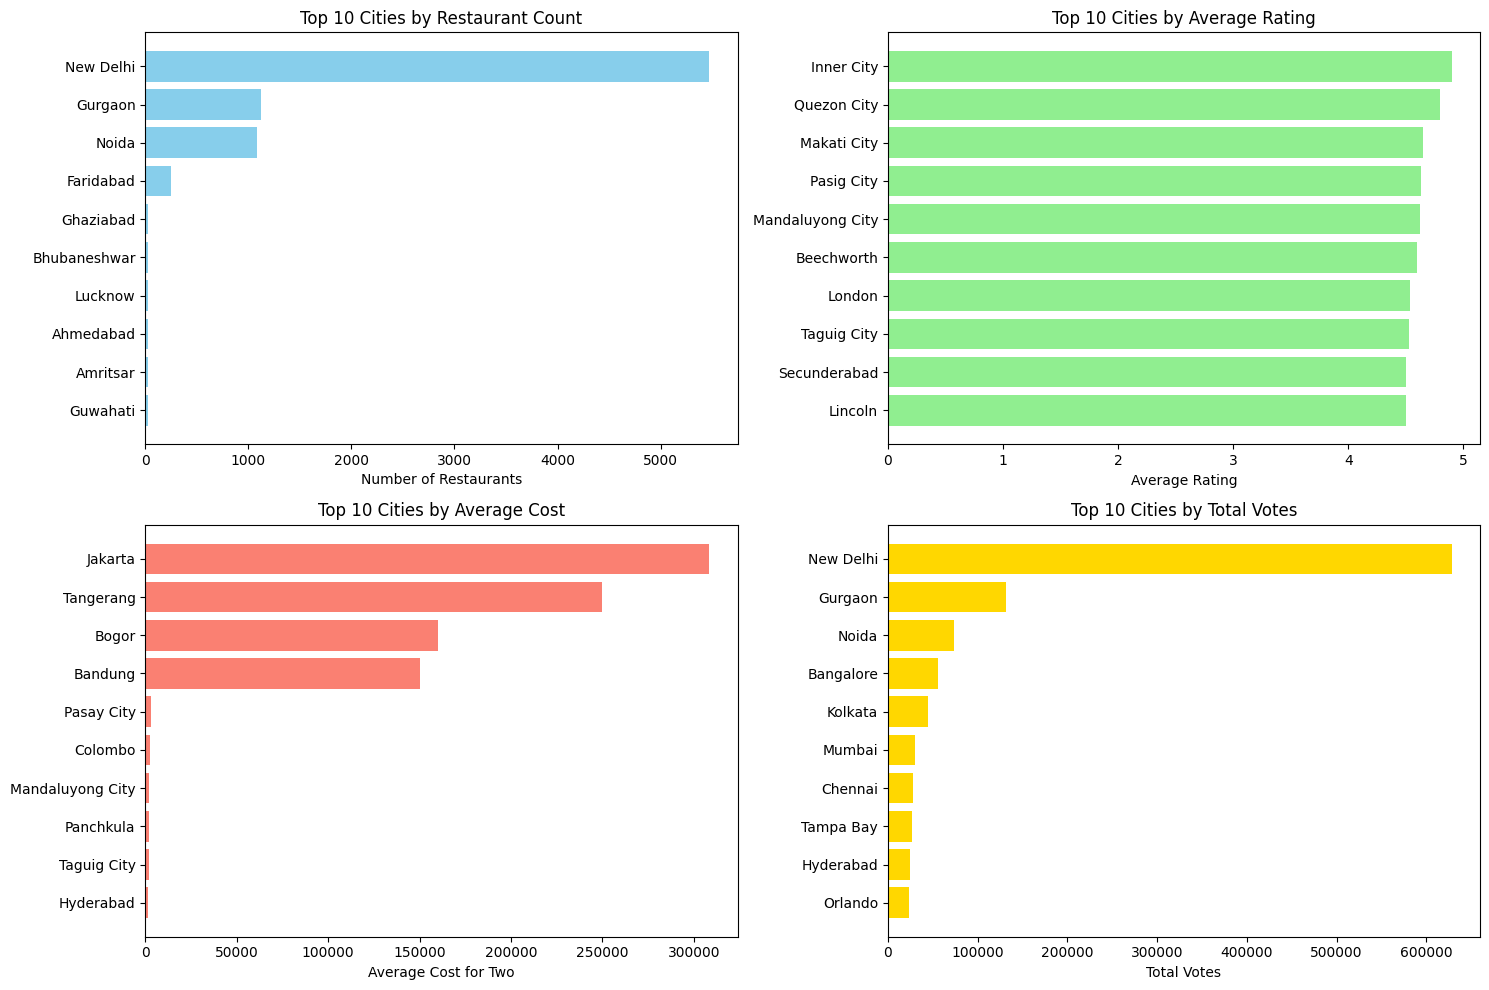

In [30]:
# Get top 10 cities by restaurant count
top_cities = df_task4['City'].value_counts().head(10).index.tolist()
top_cities_data = df_task4[df_task4['City'].isin(top_cities)]

# City-wise statistics
city_detailed_stats = top_cities_data.groupby('City').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': ['mean', 'median', 'std'],
    'Average Cost for two': 'mean',
    'Price range': 'mean',
    'Votes': 'sum'
}).round(2)

city_detailed_stats.columns = ['Count', 'Avg Rating', 'Median Rating', 'Rating Std', 'Avg Cost', 'Avg Price Range', 'Total Votes']
print("\nDetailed Statistics for Top 10 Cities:")
print(city_detailed_stats.sort_values('Count', ascending=False))

# Visualize city statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# City counts
top_cities_counts = df_task4['City'].value_counts().head(10)
axes[0, 0].barh(top_cities_counts.index, top_cities_counts.values, color='skyblue')
axes[0, 0].set_xlabel('Number of Restaurants')
axes[0, 0].set_title('Top 10 Cities by Restaurant Count')
axes[0, 0].invert_yaxis()

# Average ratings by city
city_ratings = df_task4.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
axes[0, 1].barh(city_ratings.index, city_ratings.values, color='lightgreen')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_title('Top 10 Cities by Average Rating')
axes[0, 1].invert_yaxis()

# Average cost by city
city_cost = df_task4.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)
axes[1, 0].barh(city_cost.index, city_cost.values, color='salmon')
axes[1, 0].set_xlabel('Average Cost for Two')
axes[1, 0].set_title('Top 10 Cities by Average Cost')
axes[1, 0].invert_yaxis()

# Total votes by city
city_votes = df_task4.groupby('City')['Votes'].sum().sort_values(ascending=False).head(10)
axes[1, 1].barh(city_votes.index, city_votes.values, color='gold')
axes[1, 1].set_xlabel('Total Votes')
axes[1, 1].set_title('Top 10 Cities by Total Votes')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


Top 10 Cuisines Overall:
Primary_cuisine
North Indian    2992
Chinese          855
Fast Food        672
Bakery           621
Cafe             617
American         278
South Indian     262
Mithai           246
Street Food      236
Continental      235
Name: count, dtype: int64

Cuisine Distribution in Top 5 Cities:
Primary_cuisine  American  Bakery  Cafe  Chinese  Continental  Fast Food  \
City                                                                       
Faridabad               3      24    15       21            0         25   
Ghaziabad               0       1     3        2            0          3   
Gurgaon                24      95    73       93           43         60   
New Delhi              74     397   298      569          112        446   
Noida                  22      87    65       98           21         98   

Primary_cuisine  Mithai  North Indian  South Indian  Street Food  
City                                                              
Faridabad       

<Figure size 1400x800 with 0 Axes>

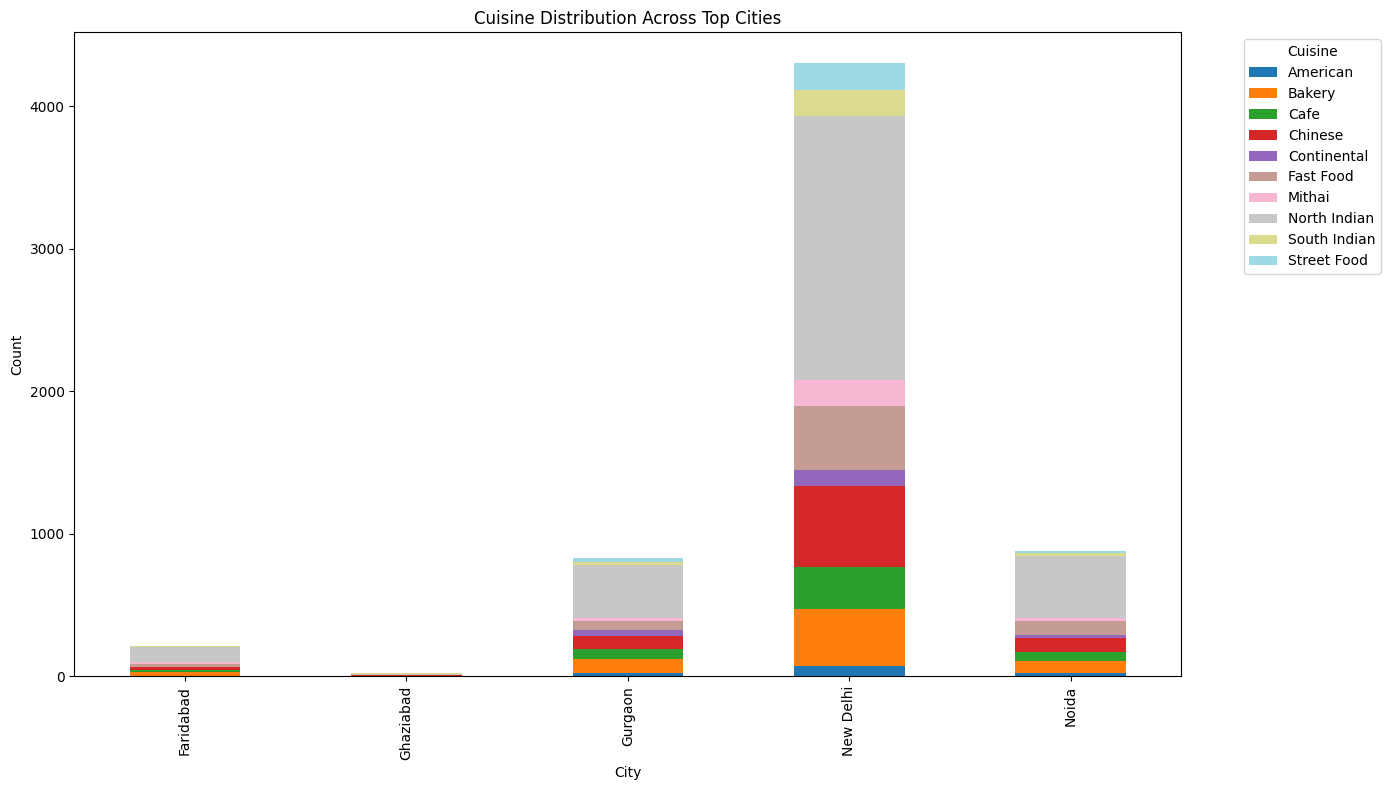

In [31]:
# Analyze cuisine distribution across top cities
# Extract primary cuisine
df_task4['Primary_cuisine'] = df_task4['Cuisines'].str.split(',').str[0]

# Top cuisines overall
top_cuisines_overall = df_task4['Primary_cuisine'].value_counts().head(10)
print("\nTop 10 Cuisines Overall:")
print(top_cuisines_overall)

# Create a pivot table of cuisine by city
top_cities_for_cuisine = df_task4['City'].value_counts().head(5).index.tolist()
top_cuisines_list = df_task4['Primary_cuisine'].value_counts().head(10).index.tolist()

cuisine_city_matrix = pd.crosstab(
    df_task4[df_task4['City'].isin(top_cities_for_cuisine)]['City'],
    df_task4[df_task4['Primary_cuisine'].isin(top_cuisines_list)]['Primary_cuisine']
)

print("\nCuisine Distribution in Top 5 Cities:")
print(cuisine_city_matrix)

# Visualize cuisine distribution
plt.figure(figsize=(14, 8))
cuisine_city_matrix.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Cuisine Distribution Across Top Cities')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Price Range Distribution in Top Cities:
Price range     1     2    3    4
City                             
Faridabad     151    86   14    0
Ghaziabad       9    13    2    1
Gurgaon       453   440  158   67
New Delhi    3052  1656  549  216
Noida         565   401   93   21


<Figure size 1200x600 with 0 Axes>

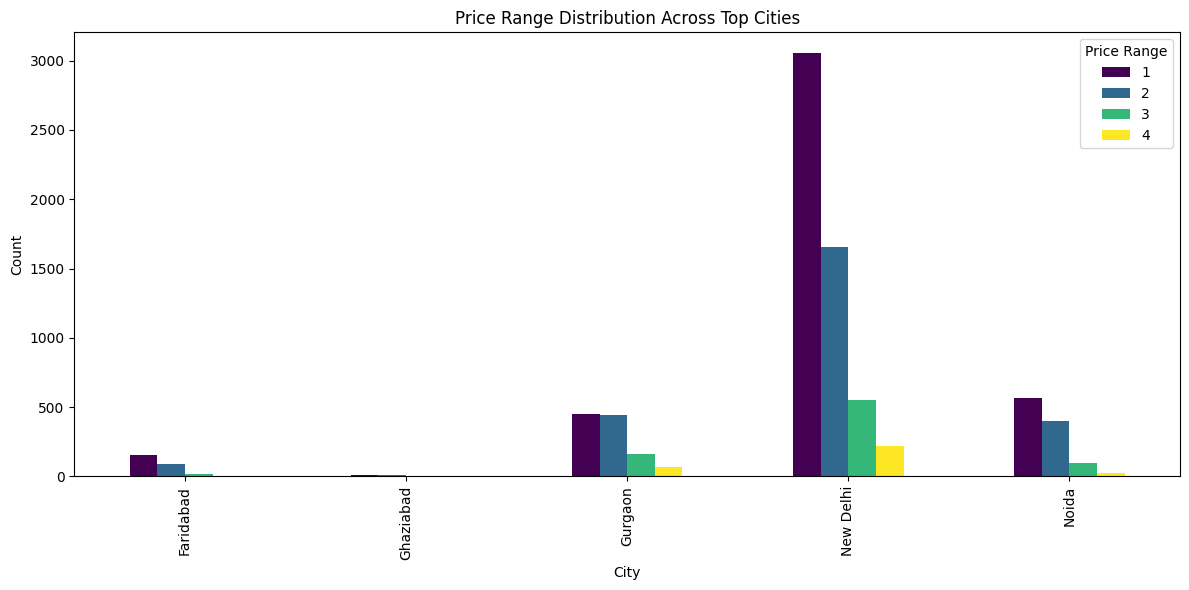

In [32]:
# Analyze price range distribution across cities
price_by_city = pd.crosstab(
    df_task4[df_task4['City'].isin(top_cities_for_cuisine)]['City'],
    df_task4[df_task4['City'].isin(top_cities_for_cuisine)]['Price range']
)

print("\nPrice Range Distribution in Top Cities:")
print(price_by_city)

# Visualize price range distribution
plt.figure(figsize=(12, 6))
price_by_city.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Price Range Distribution Across Top Cities')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()

In [34]:
# Use DBSCAN to identify restaurant clusters
coords = df_task4[['Latitude', 'Longitude']].values

# Convert to radians for haversine distance
from math import radians
coords_rad = np.radians(coords)

# Apply DBSCAN with epsilon in km (convert to radians: 1km \u2248 0.009 radians)
epsilon_km = 5  # 5km radius
epsilon_rad = epsilon_km / 6371  # Earth's radius in km

clustering = DBSCAN(eps=epsilon_rad, min_samples=5, algorithm='ball_tree', metric='haversine')
df_task4['Cluster'] = clustering.fit_predict(coords_rad)

print(f"\nNumber of clusters found: {df_task4['Cluster'].nunique()}")


Number of clusters found: 93
